# <center> **Implémentation d'algorithmes de Machine Learning pour la résolution de problèmes de classification multiclasse**

[OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

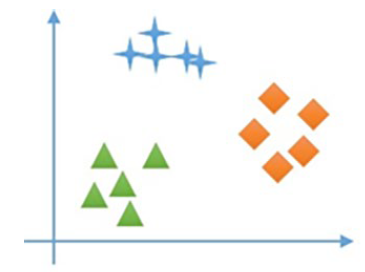

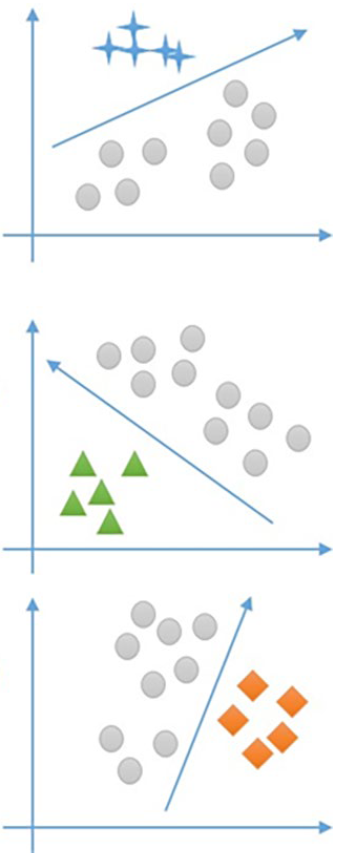

## Application de OneVsRestClassifier

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score

In [2]:
segmentation = pd.read_csv('Segmentation.csv')
segmentation.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment
0,12346,326,326,2,0.00,Fence Sitter
1,12349,19,19,73,1757.55,Potential
2,12350,310,310,17,334.40,Fence Sitter
3,12353,204,204,4,89.00,Fence Sitter
4,12354,232,232,58,1079.40,Fence Sitter


In [3]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB


In [4]:
segmentation['CustomerID'].nunique()

3046

In [5]:
segmentation['Segment'].value_counts(normalize = True)

Potential       0.521011
Fence Sitter    0.338148
Loyal           0.140840
Name: Segment, dtype: float64

In [7]:
X = segmentation.drop(['CustomerID', 'Segment'], axis = 1)
y = segmentation['Segment']

In [8]:
seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [9]:
X_train.shape

(2436, 4)

In [11]:
y_train.shape

(2436,)

In [12]:
X_test.shape

(610, 4)

In [13]:
y_test.shape

(610,)

In [14]:
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [15]:
y_pred = ovr.predict(X_test)

In [16]:
y_pred

array(['Potential', 'Potential', 'Fence Sitter', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Potential',
       'Potential', 'Loyal', 'Fence Sitter', 'Potential', 'Potential',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Potential', 'Loyal', 'Potential',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Potential', 'Loyal',
       'Fence Sitter', 'Potential', 'Potential', 'Potential',
       'Fence Sitter', 'Potential', 'Fence Sitter', 'Potential',
       'Fence Sitter', 'Potential', 'Loyal', 'Fence Sitter',
       'Fence Sitter', 'Fence Sitter', 'Potential', 'Fence Sitter',
       'Fence Sitter', 'Potential', 'Loyal', 'Fence Sitter', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Fence Sitter',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Potential

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Fence Sitter       0.99      0.99      0.99       197
       Loyal       1.00      0.94      0.97        94
   Potential       0.98      1.00      0.99       319

    accuracy                           0.99       610
   macro avg       0.99      0.98      0.98       610
weighted avg       0.99      0.99      0.99       610



In [18]:
accuracy_score(y_test, y_pred)

0.9885245901639345

In [21]:
rf = RandomForestClassifier(random_state = seed)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [22]:
y_pred_rf = rf.predict(X_test)

In [23]:
y_pred_rf

array(['Potential', 'Potential', 'Fence Sitter', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Potential',
       'Potential', 'Loyal', 'Fence Sitter', 'Potential', 'Potential',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Potential', 'Loyal', 'Potential',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Potential', 'Loyal',
       'Fence Sitter', 'Potential', 'Potential', 'Potential',
       'Fence Sitter', 'Potential', 'Fence Sitter', 'Potential',
       'Fence Sitter', 'Potential', 'Loyal', 'Fence Sitter',
       'Fence Sitter', 'Fence Sitter', 'Potential', 'Fence Sitter',
       'Fence Sitter', 'Potential', 'Loyal', 'Fence Sitter', 'Potential',
       'Potential', 'Fence Sitter', 'Fence Sitter', 'Fence Sitter',
       'Potential', 'Potential', 'Potential', 'Potential', 'Potential',
       'Potential', 'Potential

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

Fence Sitter       0.99      1.00      1.00       197
       Loyal       0.99      0.97      0.98        94
   Potential       0.99      1.00      1.00       319

    accuracy                           0.99       610
   macro avg       0.99      0.99      0.99       610
weighted avg       0.99      0.99      0.99       610



In [25]:
accuracy_score(y_test, y_pred_rf)

0.9934426229508196